In [10]:
# imports
from sklearn.metrics import explained_variance_score
import numpy as np

In [11]:
# setup matplotlib
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
params = {'legend.fontsize': 23,
          'figure.figsize': (40, 5),
         'axes.labelsize': 23,
         'axes.titlesize': 23,
         'xtick.labelsize': 23,
         'ytick.labelsize': 23,
         'lines.linewidth': 5}
pylab.rcParams.update(params)

In [12]:
# function to load pre-computed MGC results for all 20 simulations
def mgc_load_results(file_name, results_dir="../independence_tests/unit_tests/mgc/data/mgc/"):
    mgc_results = np.genfromtxt(results_dir + file_name, delimiter=',')[1:]
    if file_name == "step_sim_res.csv":
        pMGC = mgc_results[:, 0][0]
        statMGC = mgc_results[:, 1][0]
        pLocalCorr = mgc_results[:, 2:4]
        localCorr = mgc_results[:, 4:6]
        optimalScale = mgc_results[:, 6:8][0]
    else:
        pMGC = mgc_results[:, 0][0]
        statMGC = mgc_results[:, 1][0]
        pLocalCorr = mgc_results[:, 2:52]
        localCorr = mgc_results[:, 52:102]
        optimalScale = mgc_results[:, 102:104][0]

    return (pMGC, statMGC, pLocalCorr, localCorr, optimalScale)

In [13]:
# function to load pre-computed FastMGC results for all 20 simulations
def fast_mgc_load_results(file_name, results_dir="../independence_tests/unit_tests/mgc/data/fast_mgc/"):
    mgc_results = np.genfromtxt(results_dir + file_name, delimiter=',')
    pMGC = mgc_results[:, 0][0]
    statMGC = mgc_results[:, 1][0]
    localCorr = mgc_results[:, 2:52]
    optimalScale = np.array(np.unravel_index(int(mgc_results[:, 52][0])-1, (50, 50))) + 1  # add 1 to match Matlab indexing
    ConfidenceInterval = mgc_results[:, 53:55][0]
    RequiredSize = mgc_results[:, 55][0]

    return (pMGC, statMGC, localCorr, optimalScale, ConfidenceInterval, RequiredSize)

In [14]:
# list of all 20 simulations
simulations = ["linear_sim", "exp_sim", "cub_sim", "joint_sim", "step_sim",
               "quad_sim", "w_sim", "spiral_sim", "ubern_sim", "log_sim", "root_sim",
               "sin_sim", "sin_sim_16", "square_sim", "two_parab_sim", "circle_sim",
               "ellipsis_sim", "square_sim_", "multi_noise_sim", "multi_indep_sim"]

In [15]:
# load all pre-computed results
mgc_test_stats = []
mgc_p_values = []
mgc_optimal_scales = []

fast_mgc_test_stats = []
fast_mgc_p_values = []
fast_mgc_optimal_scales = []

for simulation in simulations:
    pMGC, statMGC, localCorr, optimalScale, ConfidenceInterval, RequiredSize = fast_mgc_load_results(simulation + "_fast_res.csv")
    fast_mgc_test_stats.append(statMGC)
    fast_mgc_p_values.append(pMGC)
    fast_mgc_optimal_scales.append(np.ravel_multi_index((int(optimalScale[0])-1, int(optimalScale[1])-1), [50, 50]))
    pMGC, statMGC, _, localCorr, optimalScale = mgc_load_results(simulation + "_res.csv")
    mgc_test_stats.append(statMGC)
    mgc_p_values.append(pMGC)
    mgc_optimal_scales.append(np.ravel_multi_index((int(optimalScale[0])-1, int(optimalScale[1])-1), [50, 50]))

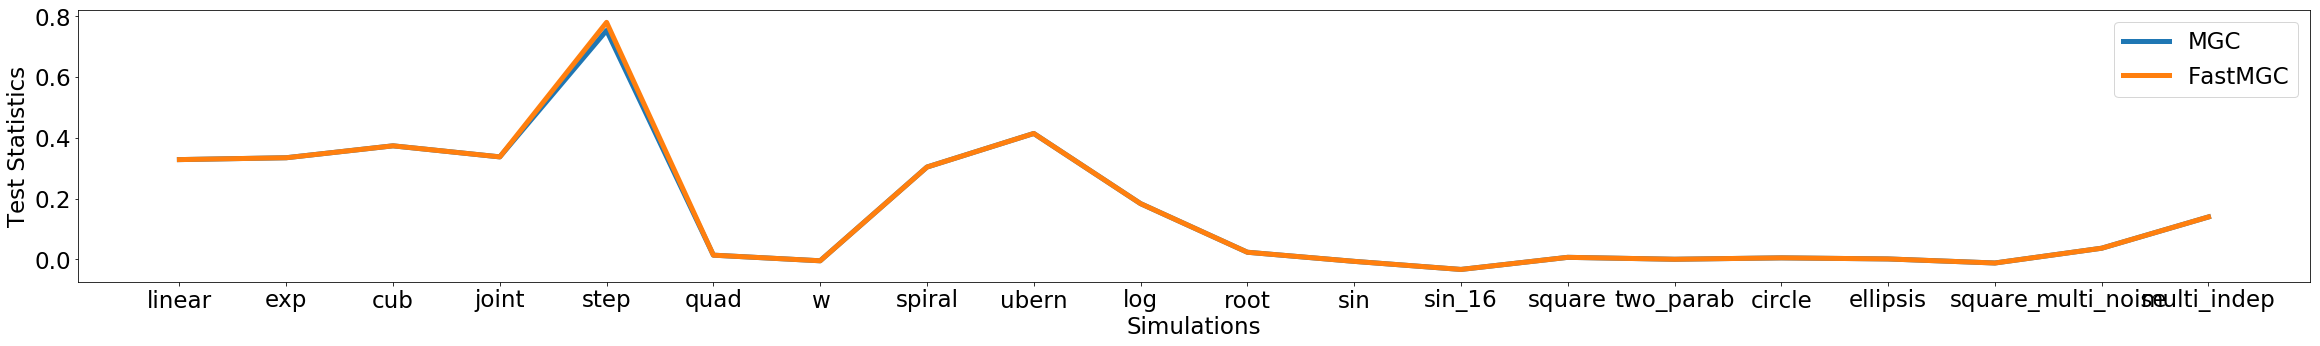

Degree of similarity between MGC and FastMGC: 0.9992069965872896 (1.0 means exactly the same)


In [16]:
# compare all the MGC vs FastMGC test statistics
fig, ax = plt.subplots()
fig.canvas.draw()
ax.plot(mgc_test_stats, label="MGC")
ax.plot(fast_mgc_test_stats, label="FastMGC")
ax.set_xlabel("Simulations")
ax.set_ylabel("Test Statistics")
ax.set_xticks(range(0, len(simulations)))
ax.set_xticklabels([s.replace("_sim", "")for s in simulations])
plt.legend()
plt.show()

print("Degree of similarity between MGC and FastMGC:", explained_variance_score(mgc_test_stats, fast_mgc_test_stats), "(1.0 means exactly the same)")

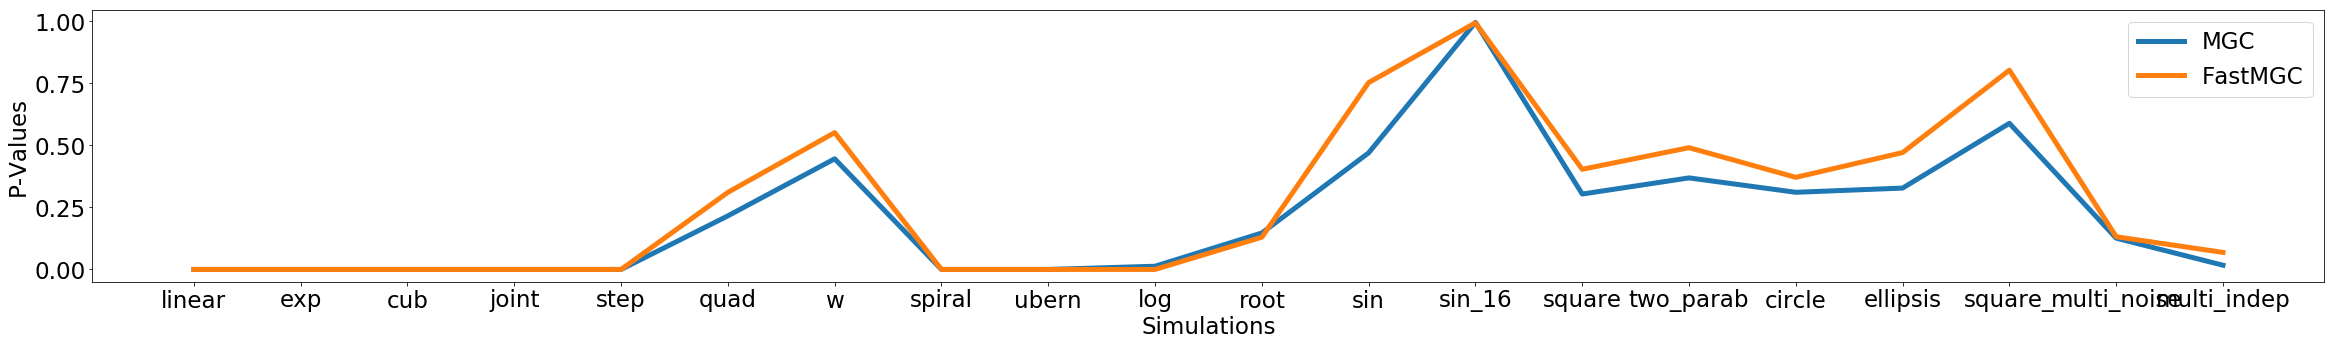

Degree of similarity between MGC and FastMGC: 0.9010771458339606 (1.0 means exactly the same)


In [17]:
# compare all the MGC vs FastMGC P-values
fig, ax = plt.subplots()
fig.canvas.draw()
ax.plot(mgc_p_values, label="MGC")
ax.plot(fast_mgc_p_values, label="FastMGC")
ax.set_xlabel("Simulations")
ax.set_ylabel("P-Values")
ax.set_xticks(range(0, len(simulations)))
ax.set_xticklabels([s.replace("_sim", "")for s in simulations])
plt.legend()
plt.show()

print("Degree of similarity between MGC and FastMGC:", explained_variance_score(mgc_p_values, fast_mgc_p_values), "(1.0 means exactly the same)")

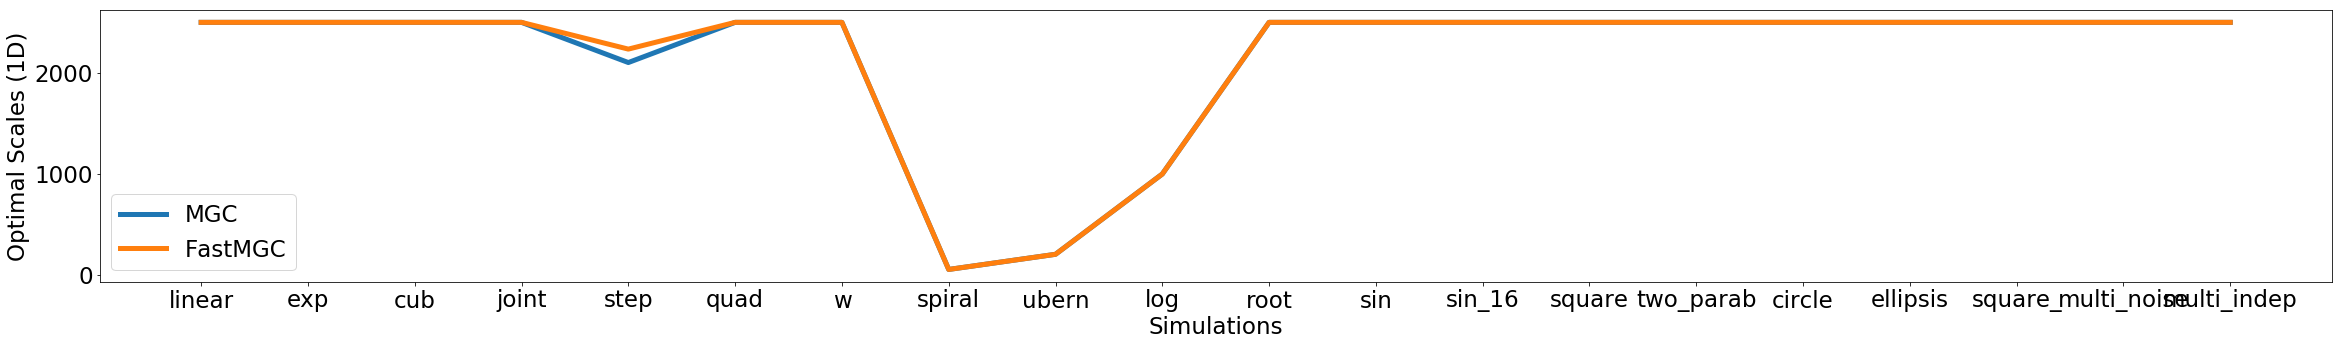

Degree of similarity between MGC and FastMGC: 0.9985350774697581 (1.0 means exactly the same)


In [18]:
# compare all the MGC vs FastMGC Optimal Scales
fig, ax = plt.subplots()
fig.canvas.draw()
ax.plot(mgc_optimal_scales, label="MGC")
ax.plot(fast_mgc_optimal_scales, label="FastMGC")
ax.set_xlabel("Simulations")
ax.set_ylabel("Optimal Scales (1D)")
ax.set_xticks(range(0, len(simulations)))
ax.set_xticklabels([s.replace("_sim", "")for s in simulations])
plt.legend()
plt.show()

print("Degree of similarity between MGC and FastMGC:", explained_variance_score(mgc_optimal_scales, fast_mgc_optimal_scales), "(1.0 means exactly the same)")